# Data Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [3]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


# Data Visualization

In [5]:
import seaborn as sns

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'plt' is not defined

### There's some correlation between VOC and fail. Let's explore more about it.

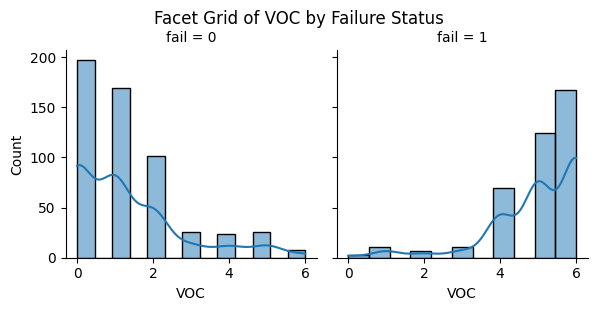

In [ ]:
# Create a facet grid for a selected feature
feature = 'VOC'  # Replace with actual feature name
facet = sns.FacetGrid(df, col='fail')
facet.map(sns.histplot, feature, kde=True)
facet.add_legend()
facet.fig.suptitle(f'Facet Grid of {feature} by Failure Status', y=1.02)
plt.show()


### When are more VOC (Volatile organic compounds level detected near the machine), there's more machine failures.

In [7]:
X = df[['VOC']] 
y = df['fail']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       160
           1       0.84      0.90      0.87       124

    accuracy                           0.88       284
   macro avg       0.88      0.89      0.88       284
weighted avg       0.89      0.88      0.88       284

Confusion Matrix:
 [[139  21]
 [ 12 112]]


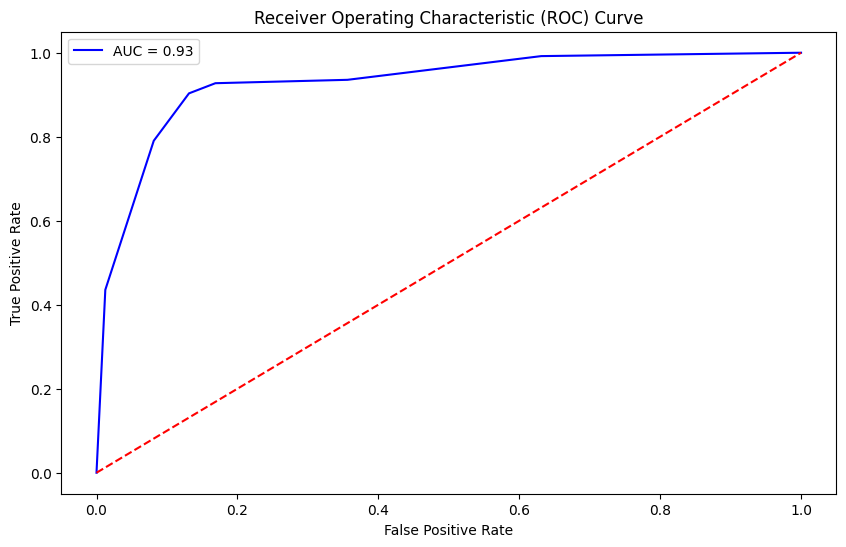

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Create a GridSearchCV object
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC Score:", grid.best_score_)

# Use the best estimator to predict
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'C': 0.1}
Best ROC-AUC Score: 0.9485243181366101
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       160
           1       0.84      0.90      0.87       124

    accuracy                           0.88       284
   macro avg       0.88      0.89      0.88       284
weighted avg       0.89      0.88      0.88       284

Confusion Matrix (Best Model):
 [[139  21]
 [ 12 112]]


In [11]:
# Assuming new_data is a DataFrame containing the new data with a 'VOC' column
new_data = pd.DataFrame({'VOC': [...]})

# Make predictions
predictions = best_model.predict(new_data[['VOC']])
prediction_probabilities = best_model.predict_proba(new_data[['VOC']])[:, 1]

print("Predictions:", predictions)
print("Prediction Probabilities:", prediction_probabilities)


TypeError: float() argument must be a string or a real number, not 'ellipsis'